In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Import

In [2]:
data = pd.read_csv( 'Fisher.csv' )
m = data.as_matrix()
labels = m[:,0]
labels[ labels==2 ] = 1  # squash class 2 into class 1
labels = np.atleast_2d( labels ).T
features = m[:,1:5]

In [3]:
labels.shape

(150, 1)

In [4]:
features.shape

(150, 4)

In [2]:
#  run after

def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
labels[ labels < 5 ] = 0
labels[ labels >= 5 ] = 1

# Perceptron Model Def

In [12]:
import pdb

class perceptron:
    def __init__(self):
        pass
    
    def fit(self, x, y, stepsizes):
#         pdb.set_trace()
        x = np.asmatrix(x)
        y = np.atleast_2d(y)
        #  init with small random wieghts and add bias nodes
        self.w = np.atleast_2d(np.random.rand(x.shape[1] + 1) - 0.5 / 100000.0)
        x = np.hstack((x, np.atleast_2d(np.ones(x.shape[0])).T))
        
        
        accuracies_for_all_stepsizes = []
        l2_norms_for_all_stepsizes = []
        
        #  for each stepsize
        for stepsize in stepsizes:
        
            accuracies = []
            l2_norms = []

        
            #  number of epochs to run
            for epoch_num in range(100):
#                 print(epoch_num)

                #  train on every instance in x
                for i in range(x.shape[0]):
                    predicted = np.dot(self.w, x[i].T)
                    # apply heavyside step function
                    predicted = self.heavyside_step_filter(predicted)
                    actual = y[i]

                    #  update every feature weight
                    for j in range(self.w.shape[1]):
                        self.w[0,j] = self.w[0,j] + (stepsize * (actual - predicted) * x[i,j])

                accuracies.append(self.accuracy_score(x, y))
                l2_norms.append(np.log(self.l2_norm()))
            accuracies_for_all_stepsizes.append(accuracies)
            l2_norms_for_all_stepsizes.append(l2_norms)
            
        self.plot_metrics(accuracies_for_all_stepsizes, l2_norms_for_all_stepsizes, 
                          stepsizes)
        
    def heavyside_step_filter(self, x):
        return 0.5 * (np.sign(x) + 1)
        
        
    def accuracy_score(self, x, y):        
#         print (list(zip(y, self.heavyside_step_filter(x * self.w.T))))
        num_incorrect = abs(y - self.heavyside_step_filter(x * self.w.T)).sum()
        return (y.shape[0] - num_incorrect) / y.shape[0]
    
    def l2_norm(self):
        return np.sqrt(np.dot(self.w,self.w.T))[0][0]

    def plot_metrics(self, accuracies_for_all_stepsizes, l2_norms_for_all_stepsizes, 
                          stepsizes):
        fig, axes = plt.subplots(1,2)
        
        for index, stepsize in enumerate(stepsizes):
            axes[0].plot(accuracies_for_all_stepsizes[index], label=str(stepsize))
        axes[0].legend(loc='lower right')
        axes[0].set_title("Accuracy")
        axes[0].set_xlim(0,100)
        axes[0].set_ylim(0,1.1)
#         print(l2_norms)
#         print(len(l2_norms))
        for index, stepsize in enumerate(stepsizes):
            axes[1].plot(l2_norms_for_all_stepsizes[index], label=str(stepsize))
        axes[1].legend(loc='center right')
        axes[1].set_title("L2 Norm")
        axes[1].set_xlim(0,100)
#         axes[1].set_ylim(0,110)


# Iris Dataset

In [6]:
clf = perceptron()

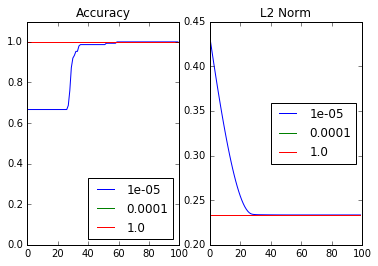

In [11]:
clf.fit(features, labels, [0.00001, 0.0001, 1.0])

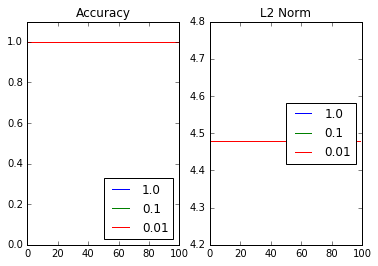

In [8]:
clf.fit(features, labels, [1.0, 0.1, 0.01])

# CIFAR-10 Dataset

In [13]:
clf = perceptron()

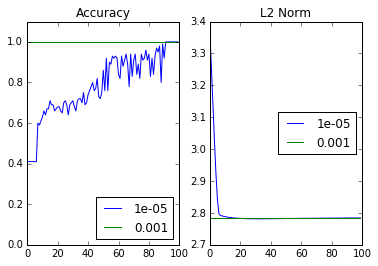

In [14]:
#  10,000 was running too slowly so I used 100 instead 
clf.fit(features[:100,:], labels[:100], [0.00001, 0.001])